# Teste técnico Oncase
## Construção de um classificador

Teste técnico realizado pela empresa Oncase para testar conhecimentos na área de ciência de dados. Descrição do problema:

Construção de um classificador, identificação das variáveis que exercem maior impacto sobre o "target" (variável alvo) e justificativa através da análise dos resultados obtidos.
- Métricas: precision, recall, f2-score;
- Arquivos referentes aos dados: classification_test.csv e classification_train.csv

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import KFold
from sklearn.metrics import fbeta_score, accuracy_score, classification_report, confusion_matrix

In [2]:
# Importando dados de teste e treinamento

test = pd.read_csv(r"C:\Users\laila\Documents\classifier-oncase\classification_test.csv")
train = pd.read_csv(r"C:\Users\laila\Documents\classifier-oncase\classification_train.csv")

train.describe()

,x1,x2,target
count,670.000000,670.000000,670.000000
mean,0.481824,0.262611,0.505970
std,0.914772,0.615023,0.500338
min,-1.939767,-1.313970,0.000000
25%,-0.169615,-0.159189,0.000000
50%,0.492489,0.275538,1.000000
75%,1.159680,0.717589,1.000000
max,2.590410,1.904169,1.000000


In [3]:
# Selecionando as entradas e o target dos dados

X_train = train.drop(columns=["target"])
Y_train = train["target"]

X_test = test.drop(columns=["target"])
Y_test = test["target"]

Text(0.5, 1.0, 'Gráfico de dispersão')

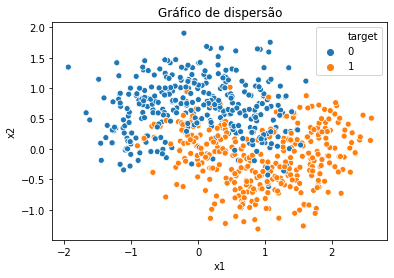

In [4]:
# Análise gráfica a dispersão dos dados 

sns.scatterplot(x="x1", y="x2", data=train, hue="target").set_title("Gráfico de dispersão")

In [8]:
# Normalização dos dados e treinamento dos modelos

def normalize(X):
    X_norm = X.copy(deep=True)
    numerical_cols = X_norm.columns[X_norm.dtypes == 'float'].tolist()
    X_norm[numerical_cols] = (X_norm[numerical_cols] - X_norm[numerical_cols].min()) / (X_norm[numerical_cols].max() - X_norm[numerical_cols].min())
    return X_norm

def train_models(models, X_train, Y_train, X_test, Y_test, k=30):
    metrics = {}
    X_norm = normalize(X_train)
    X_test_norm = normalize(X_test)    
    kf = KFold(n_splits=k, shuffle=True)
    X_norm = X_norm.values
    y = Y_train.values
    for model in models:
        clf = models[model]
        metrics[model] = {'train': [], 'valid':[], 'test': []}
        for train_index, valid_index in kf.split(X_train):
            X_train, X_valid = X_norm[train_index], X_norm[valid_index]
            y_train, y_valid = y[train_index], y[valid_index]
            clf.fit(X_train, y_train)
            y_pred_train = clf.predict(X_train)
            y_pred_valid = clf.predict(X_valid)
            y_pred_test = clf.predict(X_test_norm)
            metrics[model]['train'].append(accuracy_score(y_train, y_pred_train))
            metrics[model]['valid'].append(accuracy_score(y_valid, y_pred_valid))
            metrics[model]['test'].append(accuracy_score(Y_test, y_pred_test))
        
        print(model)
        mean_train_accuracy = np.round(np.array(metrics[model]['train']).mean(), 3)
        mean_train_accuracy_std = np.round(np.array(metrics[model]['train']).std() * 2, 3)
        print(f'Train\t\t Accuracy: {mean_train_accuracy} (+/- {mean_train_accuracy_std})')
        mean_valid_accuracy = np.round(np.array(metrics[model]['valid']).mean(), 3)
        mean_valid_accuracy_std = np.round(np.array(metrics[model]['valid']).std() * 2, 3)
        print(f'Validation\t Accuracy: {mean_valid_accuracy} (+/- {mean_valid_accuracy_std})')
        mean_test_accuracy = np.round(np.array(metrics[model]['test']).mean(), 3)
        mean_test_accuracy_std = np.round(np.array(metrics[model]['test']).std() * 2, 3)
        print(f'Test\t\t Accuracy: {mean_test_accuracy} (+/- {mean_test_accuracy_std})')
        print(f'\nConfusion Matrix (Last Fold): \n{confusion_matrix(Y_test, y_pred_test)}')
        print(f'\nClassifier Report (Last Fold): \n{classification_report(Y_test, y_pred_test, target_names=["x1", "x2"])}')
        print(f'\nf2-score \t{round(fbeta_score(Y_test, y_pred_test, beta=2.0, average="macro"), 2)}')
        print('-'*40)
            
    return metrics

In [9]:
# Modelos de treinamento a serem testados

models = {
    'Logistic_Regression': LogisticRegression(solver='liblinear'),
    'Decision_Tree': DecisionTreeClassifier(),
    'Random_Forest': RandomForestClassifier(),
    'Gradient_Boosting': GradientBoostingClassifier(),
    'Gaussian_Naive_Bayes': GaussianNB(),
    'Support_Vector_Machine': SVC(kernel='rbf'),
    'K-Nearest_Neighbors': KNeighborsClassifier()
}

metrics = train_models(models, X_train, Y_train, X_test, Y_test)

Logistic_Regression
Train		 Accuracy: 0.837 (+/- 0.007)
Validation	 Accuracy: 0.835 (+/- 0.181)
Test		 Accuracy: 0.841 (+/- 0.003)

Confusion Matrix (Last Fold): 
[[136  33]
 [ 20 141]]

Classifier Report (Last Fold): 
              precision    recall  f1-score   support

          x1       0.87      0.80      0.84       169
          x2       0.81      0.88      0.84       161

    accuracy                           0.84       330
   macro avg       0.84      0.84      0.84       330
weighted avg       0.84      0.84      0.84       330


f2-score 	0.84
----------------------------------------
Decision_Tree
Train		 Accuracy: 1.0 (+/- 0.0)
Validation	 Accuracy: 0.827 (+/- 0.17)
Test		 Accuracy: 0.814 (+/- 0.019)

Confusion Matrix (Last Fold): 
[[134  35]
 [ 28 133]]

Classifier Report (Last Fold): 
              precision    recall  f1-score   support

          x1       0.83      0.79      0.81       169
          x2       0.79      0.83      0.81       161

    accuracy             

# Análise final

